# Biogas Prediction Project - Data Exploration

In [1]:
# This notebook explores the biogas production dataset.

In [2]:
# Import required libraries
import sys
import os

# Add parent directory to path using absolute path
notebook_path = os.path.abspath('')
project_root = os.path.dirname(notebook_path)
if project_root not in sys.path:
    sys.path.append(project_root)

# Import other required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the load_data function
from data import load_data

%matplotlib inline

In [4]:
# Test data loading
df = load_data()
if df is not None:
    print("Dataset shape:", df.shape)
    display(df.head())

Data loaded successfully!
Dataset shape: (429, 23)


,Project Name,Cluster Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),...,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,System Designer(s)/Developer(s) and Affiliates,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?
0,Cargill - Sandy River Farm Digester,NaN,Farm Scale,Morrilton,Conway,AR,Covered Lagoon,Operational,2008.0,Swine,...,4200.0,NaN,1814400.0,NaN,Flared Full-time,NaN,Martin Construction Resource LLC (formerly RCM...,NaN,4482.755303,NaN
1,Butterfield RNG Digester,NaN,Farm Scale,Buckeye,Maricopa,AZ,Mixed Plug Flow,Operational,2022.0,Dairy,...,NaN,NaN,NaN,NaN,Pipeline Gas,NaN,"Avolta [Project Developer]; DVO, Inc. (formerl...",Southwest Gas,14030.128975,Yes
2,Caballero Dairy Farms Digester,NaN,Farm Scale,Eloy,Pinal,AZ,Unknown or Unspecified,Construction,2022.0,Dairy,...,NaN,NaN,NaN,NaN,Pipeline Gas,NaN,Brightmark [Project Developer],NaN,98999.890159,NaN
3,Green Gas Partners Stanfield Digester,NaN,Centralized/Regional,Maricopa,Pinal,AZ,Complete Mix,Operational,2018.0,Dairy,...,NaN,NaN,3454500.0,NaN,Pipeline Gas,NaN,Equilibrium Capital [Project Developer]; Green...,Kinger Morgan El Paso,337499.625540,NaN
4,Paloma Dairy Digester,NaN,Farm Scale,Gila Bend,Maricopa,AZ,Complete Mix,Operational,2021.0,Dairy,...,NaN,NaN,NaN,NaN,CNG,NaN,Black Bear Environmental Assets [Project Devel...,Southwest Gas Company,100569.493399,NaN


In [ ]:
# Data Exploration

# Display column names
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Display basic statistics
print("\nBasic Statistics:")
display(df.describe())

# Check missing values
print("\nMissing Values:")
display(df.isnull().sum())



Columns in the dataset:
['Project Name', 'Cluster Name', 'Project Type', 'City', 'County', 'State', 'Digester Type', 'Status', 'Year Operational', 'Animal/Farm Type(s)', 'Cattle', 'Dairy', 'Poultry', 'Swine', 'Co-Digestion', 'Biogas Generation Estimate (cu-ft/day)', 'Electricity Generated (kWh/yr)', 'Biogas End Use(s)', 'LCFS Pathway?', 'System Designer(s)/Developer(s) and Affiliates', 'Receiving Utility', 'Total Emission Reductions (MTCO2e/yr)', 'Awarded USDA Funding?']

Basic Statistics:


,Year Operational,Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr)
count,413.000000,9.000000,354.000000,7.000000e+00,45.000000,1.860000e+02,399.000000
mean,2014.491525,6234.444444,4606.646893,2.824286e+05,23598.555556,3.388010e+05,35127.557018
std,7.182642,12792.163725,5428.725201,4.117410e+05,40575.646730,3.989141e+05,47354.392920
min,1979.000000,30.000000,45.000000,3.300000e+04,10.000000,1.120000e+04,4.219814
25%,2009.000000,300.000000,1312.500000,8.200000e+04,4400.000000,1.000000e+05,6407.048767
50%,2015.000000,2400.000000,3000.000000,1.500000e+05,8900.000000,2.500000e+05,19321.483926
75%,2021.000000,4500.000000,6500.000000,2.150000e+05,28000.000000,3.893400e+05,49385.399845
max,2023.000000,40000.000000,39000.000000,1.200000e+06,239200.000000,3.454500e+06,390000.010506



Missing Values:


Project Name                                        0
Cluster Name                                      300
Project Type                                        0
City                                                0
County                                              8
State                                               0
Digester Type                                       1
Status                                              0
Year Operational                                   16
Animal/Farm Type(s)                                 0
Cattle                                            420
Dairy                                              75
Poultry                                           422
Swine                                             384
Co-Digestion                                      325
Biogas Generation Estimate (cu-ft/day)            243
Electricity Generated (kWh/yr)                    258
Biogas End Use(s)                                   3
LCFS Pathway?               

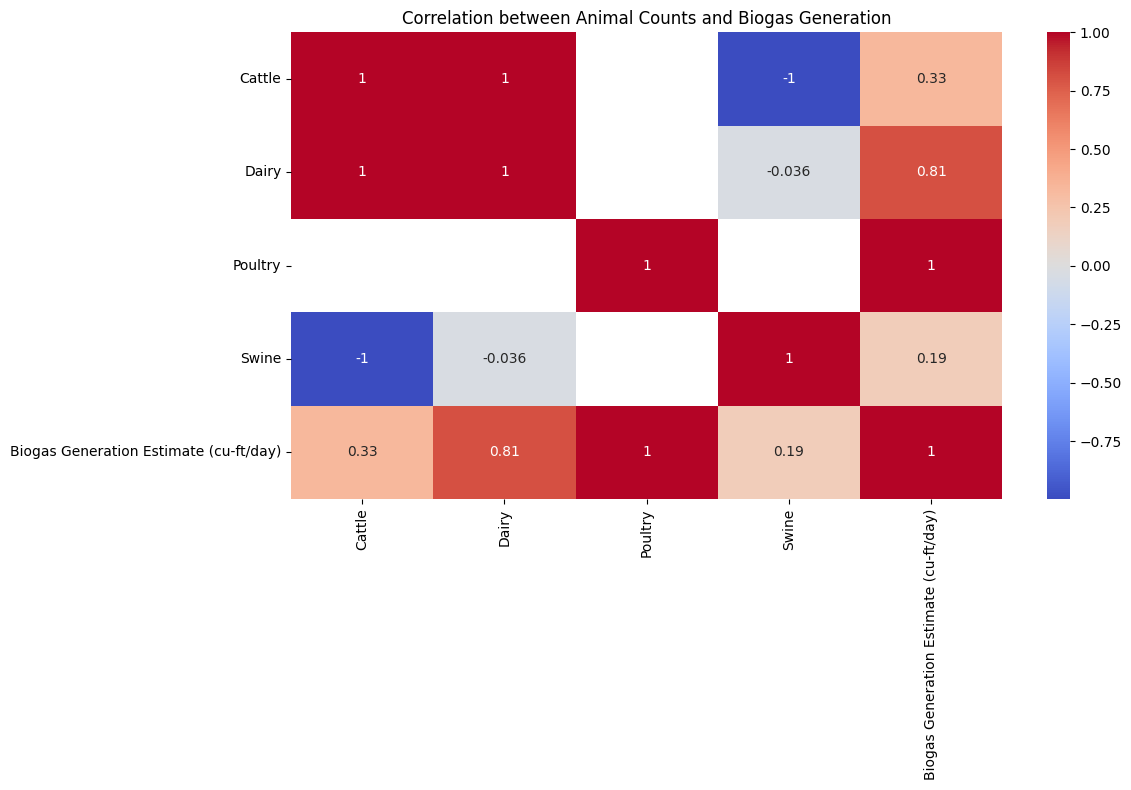

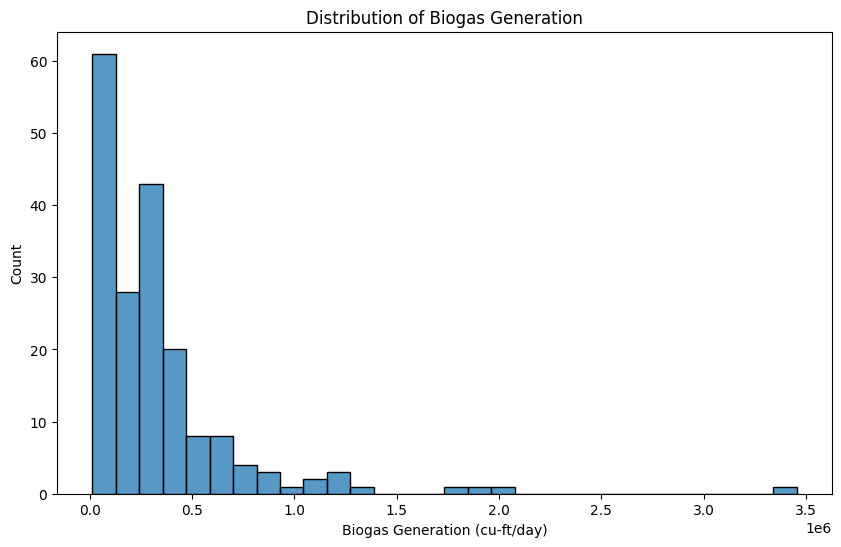

In [6]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
numeric_cols = ['Cattle', 'Dairy', 'Poultry', 'Swine', 
                'Biogas Generation Estimate (cu-ft/day)']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Animal Counts and Biogas Generation')
plt.tight_layout()
plt.show()

# Distribution of Biogas Generation
plt.figure(figsize=(10, 6))
sns.histplot(df['Biogas Generation Estimate (cu-ft/day)'], bins=30)
plt.title('Distribution of Biogas Generation')
plt.xlabel('Biogas Generation (cu-ft/day)')
plt.show()

In [ ]:
#Correlation matrix

df[numeric_cols].corr()

,Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day)
Cattle,1.000000,1.000000,NaN,-0.997744,0.329958
Dairy,1.000000,1.000000,NaN,-0.035800,0.812702
Poultry,NaN,NaN,1.0,NaN,1.000000
Swine,-0.997744,-0.035800,NaN,1.000000,0.187962
Biogas Generation Estimate (cu-ft/day),0.329958,0.812702,1.0,0.187962,1.000000
